# 1 dimensional linear regression

In [6]:
import torch
from matplotlib import pyplot as plt

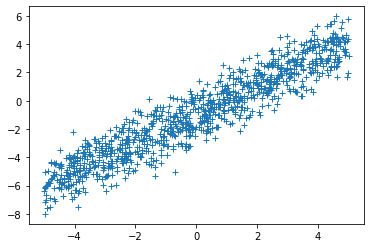

In [24]:
N = 1000
X = 10*torch.rand(N)-5
Y = X - 1 + torch.randn(N)
plt.plot(X.numpy(),Y.numpy(),linestyle='None',marker='+')
X = X.view((-1,1))
Y = Y.view((-1,1))

OrderedDict([('weight', tensor([[1.0123]])), ('bias', tensor([-0.9584]))]) tensor(1.0598, grad_fn=<MseLossBackward>)


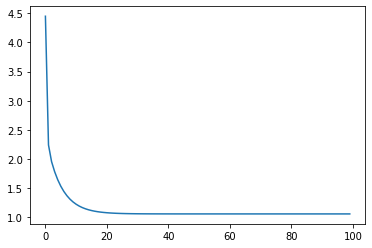

In [32]:
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(1,1)

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0)

l = []
for epoch in range(100):
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    loss.backward()
    l.append(loss.item())
    optimizer.step()
print(model.state_dict(),loss)
plt.plot(l)

# 2 dimensional linear regression

In [51]:
N = 100
X = 10*torch.rand((N,10))-5
Y = torch.matmul(X,torch.tensor([2.,-3.,2.,-3.,2.,-3.,2.,-3.,2.,-3.])) - 5 + 5* torch.randn(N)
Y = Y.view((-1,1))

OrderedDict([('weight', tensor([[ 2.1500, -3.1677,  1.9278, -2.5735,  1.9991, -3.1825,  2.2152, -3.0221,
          2.2754, -2.6394]])), ('bias', tensor([-4.8110]))]) tensor(20.1166, grad_fn=<MseLossBackward>)


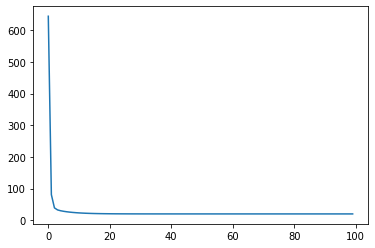

In [52]:
model = nn.Linear(10,1)

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0)

l = []
for epoch in range(100):
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    loss.backward()
    l.append(loss.item())
    optimizer.step()
print(model.state_dict(),loss)
plt.plot(l)

# Logistic Regression

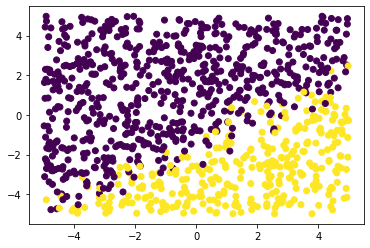

In [74]:
N = 1000
X = 10*torch.rand((N,2))-5
prob = torch.sigmoid(2*X[:,0] - 3*X[:,1] - 5)
Y = torch.bernoulli(prob)
Y = Y.view((-1,1))
plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=Y.numpy())

OrderedDict([('0.weight', tensor([[ 1.0374, -1.5686]])), ('0.bias', tensor([-2.3449]))]) tensor(0.1336, grad_fn=<BinaryCrossEntropyBackward>)
accuracy:  tensor(0.9430)


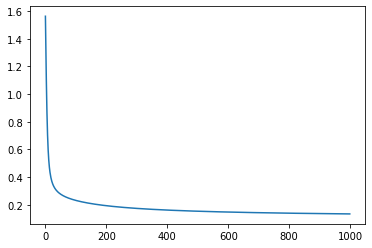

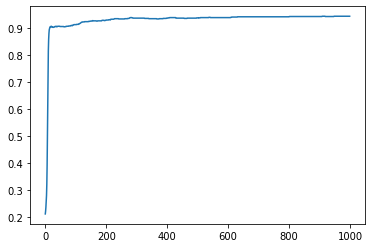

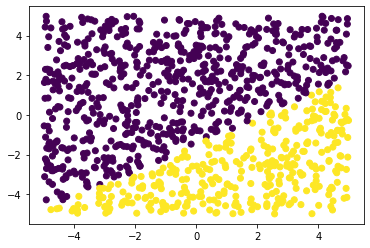

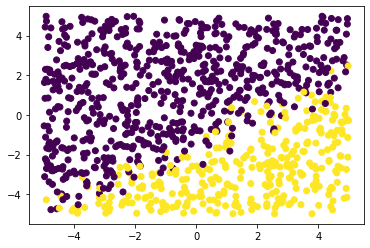

In [77]:
model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

criterion = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0)

l = []
a = []
for epoch in range(1000):
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    loss.backward()
    l.append(loss.item())
    accuracy = ((Y_pred>.5)==Y).sum()/len(Y)
    a.append(accuracy.item())
    optimizer.step()
print(model.state_dict(),loss)
plt.plot(l)
plt.figure()
plt.plot(a)
accuracy = ((Y_pred>.5)==Y).sum()/len(Y)
print("accuracy: ", accuracy)
plt.figure()
plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=(Y_pred>.5).numpy())
plt.figure()
plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=Y.numpy())

# Neural Network

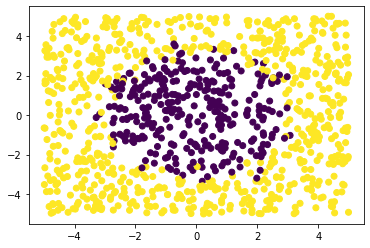

In [93]:
N = 1000
X = 10*torch.rand((N,2))-5
prob = torch.sigmoid(X[:,0]**2 + X[:,1]**2 - 10)
Y = torch.bernoulli(prob)
Y = Y.view((-1,1))
plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=Y.numpy())

OrderedDict([('0.weight', tensor([[ 0.5090, -1.2478],
        [-0.8201, -1.0753],
        [ 1.2982, -0.2497]])), ('0.bias', tensor([ 2.8825, -2.7647, -2.7653])), ('2.weight', tensor([[-15.5524,  16.6322,  16.4625]])), ('2.bias', tensor([3.7863]))]) tensor(0.1272, grad_fn=<BinaryCrossEntropyBackward>)
accuracy:  tensor(0.9520)


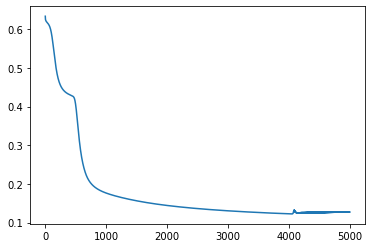

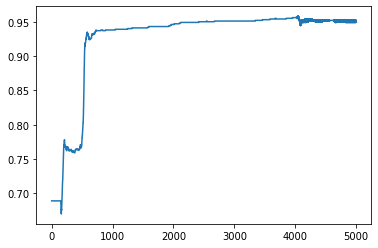

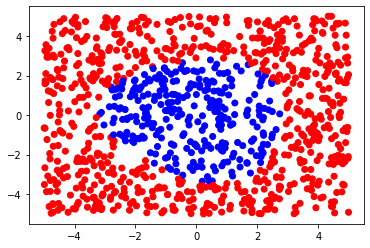

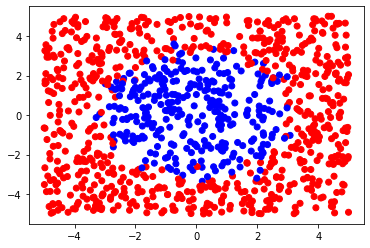

In [106]:
model = nn.Sequential(nn.Linear(2,3),nn.Sigmoid(),nn.Linear(3,1),nn.Sigmoid())

criterion = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=1, momentum=0.1)

l = []
a = []
for epoch in range(5000):
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    loss.backward()
    l.append(loss.item())
    accuracy = ((Y_pred>.5)==Y).sum()/len(Y)
    a.append(accuracy.item())
    optimizer.step()
print(model.state_dict(),loss)
plt.plot(l)
plt.figure()
plt.plot(a)
accuracy = ((Y_pred>.5)==Y).sum()/len(Y)
print("accuracy: ", accuracy)
plt.figure()
colors={0:'b',1:'r'}
plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=[colors[y] for y in (Y_pred>.5).numpy()[:,0]])
plt.figure()
plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=[colors[y] for y in (Y>.5).numpy()[:,0]])